# Theory of 2-mode squeezing in TWPA and their losses

In [346]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
import cmath
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Derivation of the covariance matrix

The quadrature operators ($R = \hat{Q}_1,\hat{P}_1,\hat{Q}_2,\hat{P}_2$) are defined as:
$$
Q_1 = \frac{\sqrt{2}}{2}(a+a^\dagger)
$$
$$
P_1 = \frac{i\sqrt{2}}{2}(a^\dagger-a)
$$
$$
Q_2 = \frac{\sqrt{2}}{2}(b+b^\dagger)
$$
$$
Q_1 = \frac{i\sqrt{2}}{2}(b^\dagger-b)
$$

Where $a$ and $b$ are defined as:
$$
a = \cosh{r}a_i+e^{i\psi}\sinh{r}b_i^\dagger
$$
$$
b^\dagger = e^{-i\psi}\sinh{r}a_i+\cosh{r}b_i^\dagger
$$

The plan is now to derive the covariance matrix defined as:
$$
[Cov]_{kj} = \frac{1}{2}\left<\{R_k,R_j\}\right>-\left<R_k\right>\left<R_j\right>
$$
Where in our case, $<,>$ is the expectation value such that:
$$
<A> = <0_a0_b|A|0_a0_b>
$$

### Definition of the two-mode vacuum state

In [843]:
#test tensor product
vac1 = basis(2,0)
vac2 = basis(2,0)
two_vac = tensor(vac1,vac2)
a = tensor(destroy(2),identity(2))
b = tensor(identity(2), destroy(2))
two_vac

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

In [851]:
#Definition of the parameter
%matplotlib inline
r = 1
psi = 0
xi = r*np.exp(1j*psi)
mu = np.cosh(r)
nu = np.exp(1j*psi)*np.sinh(r)
a0 = mu * a + nu * b.dag()
b0 = nu * a.dag() + mu * b
Q1 = (np.sqrt(2)/2)*(a0 + a0.dag())
P1 = (1j*np.sqrt(2)/2*(a0.dag()-a0))
Q2 = (np.sqrt(2)/2)*(b0 + b0.dag())
P2 = (1j*np.sqrt(2)/2*(b0.dag()-b0))

In [852]:
def AntiCom(a,b):
    return (a * b + b * a)/2
expect(AntiCom(Q2,Q2),two_vac)

1.881097845541816

In [853]:
A_11 = expect(AntiCom(Q1,Q1),two_vac)
A_22 = expect(AntiCom(P1,P1),two_vac)
A_12 = expect(AntiCom(Q1,P1),two_vac)
A_21 = expect(AntiCom(P1,Q1),two_vac)
A = np.array([[A_11,A_12],[A_21,A_22]])


B_11 = expect(AntiCom(Q2,Q2),two_vac)
B_22 = expect(AntiCom(P2,P2),two_vac)
B_12 = expect(AntiCom(Q2,P2),two_vac)
B_21 = expect(AntiCom(P2,Q2),two_vac)
B = np.array([[B_11,B_12],[B_21,B_22]])


C_11 = expect(AntiCom(Q1,Q2),two_vac)
C_22 = expect(AntiCom(P1,P2),two_vac)
C_12 = expect(AntiCom(Q1,P2),two_vac)
C_21 = expect(AntiCom(P2,Q2),two_vac)
C = np.array([[C_11,C_12],[C_21,C_22]])


D = C.transpose()

In [854]:
sigma = np.block([[A, C],[D, B]])

det = np.linalg.det(sigma)
sigma_inv = np.linalg.inv(sigma)

print('cov matrix: ', sigma)
print ()
print('determinant: ', det)


print()
print('A: ', A)
print('B: ', B)
print('C: ', C)

cov matrix:  [[ 1.88109785  0.          1.8134302   0.        ]
 [ 0.          1.88109785  0.         -1.8134302 ]
 [ 1.8134302   0.          1.88109785  0.        ]
 [ 0.         -1.8134302   0.          1.88109785]]

determinant:  0.06250000000000003

A:  [[1.88109785 0.        ]
 [0.         1.88109785]]
B:  [[1.88109785 0.        ]
 [0.         1.88109785]]
C:  [[ 1.8134302  0.       ]
 [ 0.        -1.8134302]]


[ 1.88109785  0.          1.8134302   0.          0.          1.88109785
  0.         -1.8134302   1.8134302   0.          1.88109785  0.
  0.         -1.8134302   0.          1.88109785]


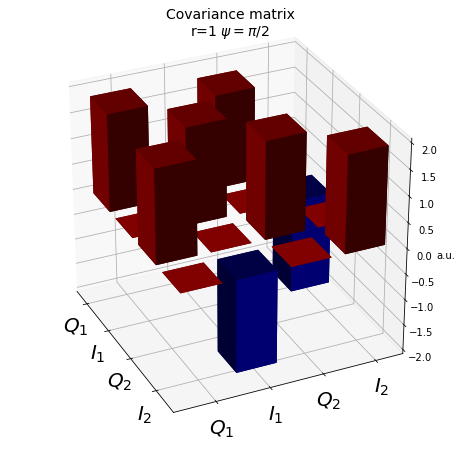

In [855]:
### Plot the covariance matrix

# setup the figure and axes
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111, projection='3d')

# # fake data
# x = ['q', 'p']
# y = ['q', 'p']
# xx, yy = np.meshgrid(x, y)

# fake data
_x = np.arange(4)
_y = np.arange(4)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()



sigma_1 = np.ravel(sigma)#[sigma11, sigma21, sigma12, sigma22]
print (sigma_1)
bottom = np.zeros_like(sigma_1)
width = depth = 0.75
ax1.view_init(elev=30, azim = -25)

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(sigma_1)   # get range of colorbars so we can normalize
min_height = np.min(sigma_1)
rgba = [cmap((k-min_height)/max_height) for k in sigma_1] 

ax1.bar3d(x, y, bottom, width, depth, sigma_1,color = rgba, shade=True)
ax1.set_title(r'Covariance matrix''\n' 'r=1 $\psi = \pi/2$', size=14)
plt.xticks([0.2, 1.2, 2.2, 3.3], [r'$Q_1$', r'$I_1$', r'$Q_2$', r'$I_2$'], size = 20) 
plt.yticks([0.5, 1.5, 2.5, 3.5], [r'$Q_1$', r'$I_1$', r'$Q_2$', r'$I_2$'], size = 20)
ax1.set_zlabel(r'a.u.')
ax1.set_zlim(-2.0, 2.0)
plt.savefig('Cov_r1_psipi-2.png')
plt.show()

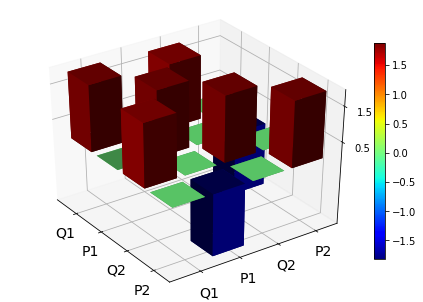

In [840]:
%matplotlib inline
a = matrix_histogram(sigma,xlabels = ['','Q1','P1','Q2','P2'],ylabels = ['','Q1','P1','Q2','P2'])


## Wigner's function

In [821]:
#Preparation of the calculation
V = np.linalg.inv(sigma)
det = np.linalg.det(sigma)
X1 = np.arange(-5,5,0.1)
Y1 = np.arange(-5,5,0.1)
X2 = np.arange(-5,5,0.1)
Y2 = np.arange(-5,5,0.1)
XX1, YY1, XX2, YY2 = np.meshgrid(X1, Y1, X2, Y2)

R = np.asarray([X1,Y1,X2,Y2])
RT = R.transpose()

In [822]:
#S_xi = np.exp(xi*a.dag()*b.dag()-xi.conjugate()*a*b)

#ket_xi = create(2)*vac2


#xvec = np.linspace(-5,5,200)
#plt.imshow(wigner(ket_xi,xvec,xvec))

AttributeError: 'tuple' object has no attribute 'dag'

In [856]:
#### Total Wigner function evaluation W(q1, p1, q2, p2)

# Make 4-dimension mesh grid (X1 Y1 X2 Y2)
X1 = np.arange(-5, 5, 0.2)
Y1 = np.arange(-5, 5, 0.2)
X2 = np.arange(-5, 5, 0.2)
Y2 = np.arange(-5, 5, 0.2)
XX1, YY1, XX2, YY2 = np.meshgrid(X1, Y1, X2, Y2)

print (np.shape(XX1))
print (np.shape(YY1))
print (np.shape(XX2))

#R = (np.array([q1_m, p1_m, q2_m, p2_m])).transpose()

matrix = sigma
matrix_inv = np.linalg.inv(matrix)
det = np.linalg.det(matrix)


W = np.zeros_like(XX1)

for i in range(np.shape(XX1)[1]):
      for j in range(np.shape(XX1)[0]):
             for k in range(np.shape(XX1)[2]):
                    for l in range(np.shape(XX1)[3]):
                        xy = np.array([XX1[i, j, k, l], YY1[i, j, k, l], XX2[i, j, k, l], YY2[i, j, k, l]]).transpose()
                        a = np.matmul(matrix_inv, (xy))
                        b = np.matmul((xy).transpose(), a)
                        c = -0.5 * b
                        d = (np.pi*np.sqrt(det))
                        W[i, j, k, l] = np.exp(c)/d
                        #print (W[i, j, k, l])

(50, 50, 50, 50)
(50, 50, 50, 50)
(50, 50, 50, 50)


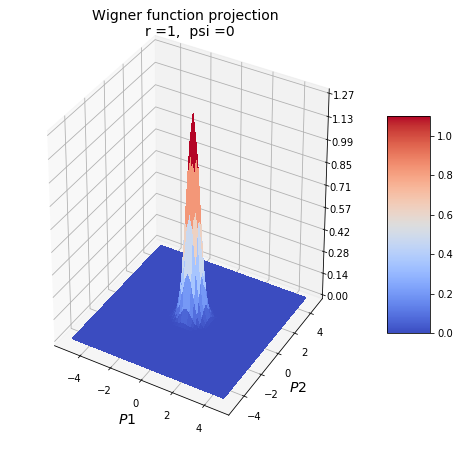

In [872]:
%matplotlib inline

cut_index = int(len(X1)/2)

Z = W[cut_index,: ,cut_index , :]

Q2 = Y2[cut_index]
P1 = Y1[cut_index]

XX1, YY1 = np.meshgrid(X1, Y1)


# Plot the surface.
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(XX1, YY1, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# # Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'$P1$', size = 14)
ax.set_ylabel(r'$P2$', size = 14)
ax.set_title('Wigner function projection\n  r ='+str('%.1g' %r)+',  psi ='+str('%.1g' %psi), size = 14)
plt.savefig('psi0_P1P2.png',dpi = 200)
plt.show()

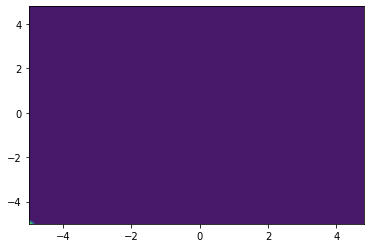

In [730]:
%matplotlib inline
test = W[cut_index,cut_index , :, :]
plt.contourf(X1,X1,test)

In [731]:
det

-1.348605231247828